# Predicting the Success of a Family Grill House Restaurant in a New Location | Submission for Professional Data Scientist Practical Exam


The given dataset contains 1090 rows and 8 columns, all of which were validated to ensure adherence to the given data requirements. The following changes were made to each column: 

1. locaation: This column is discrete and contains a unique identifier for each restaurant. It was validated to ensure uniqueness. 

2. year_3_profit: This column is nominal and binary in nature, indicating whether a restaurant was profitable after 3 years or not. 

3. local_pop: This column is discrete and contains the population within 30 minutes of travel to the restaurant. Any positive integer. The 'Unknown' values were replaced with the mean of the data. 

4. competitors: This column is discrete and contains the number of competitor restaurants within 2 kilometers. Any positive integer. 

5. nearest_fgh: This column is continuous and contains the distance in kilometers to the nearest Family Grill House location. Any positive value. 

6. hours: This column is ordinal, containing one of "Regular", "Extended", or "24 hours". Since this is ordinal data, it has been mapped to preserve the order. Empty hours were substituted with the most frequent data. 

7. highway: This column is discrete and contains travel time in minutes to the nearest highway. Should be at least 1 minute. Negative values were replaced with the mean to comply with the requirement of a minimum time of one minute. 

8. drivethru: This column is binary and contains whether the location has a drive-through order and collection service ("Yes" or "No"). As an ordinal feature, 'No drivethru' has been replaced with 'No'. 

After the data validation process, it was ensured that the given dataset adheres to data requirements while specifying the data types for each column. Double-checking was also performed to ensure consistency with the stated information.

Restaurant Success data

In [18]:
# packages import 
import pandas as pd
df = pd.read_csv('restaurant_success.csv')
df

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
0,38195,1,125567.0,0.0,6.4,Extended,3,No
1,12324,1,105571.0,0.0,5.3,24 hours,16,Yes
2,79567,0,104591.0,0.0,6.3,NaN,6,No
3,41435,1,169028.0,0.0,6.0,Extended,5,Yes
4,24969,1,Unknown,0.0,4.5,Extended,4,No drivethru
...,...,...,...,...,...,...,...,...
1085,23969,0,277169.0,0.0,4.5,Regular,22,No
1086,72777,1,17805.0,0.0,14.4,Extended,15,Yes
1087,14249,1,231969.0,0.0,5.2,24 hours,22,No
1088,91866,1,53674.0,0.0,9.4,Extended,9,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1090 non-null   int64  
 1   year_3_profit  1090 non-null   int64  
 2   local_pop      1090 non-null   object 
 3   competitors    1090 non-null   float64
 4   nearest_fgh    1090 non-null   float64
 5   hours          981 non-null    object 
 6   highway        1090 non-null   int64  
 7   drivethru      1090 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 68.2+ KB


In [20]:
df.describe()

,location,year_3_profit,competitors,nearest_fgh,highway
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,54796.488991,0.834862,0.095413,7.886789,15.009174
std,25989.191777,0.371475,0.293919,7.196412,8.507217
min,10075.000000,0.000000,0.000000,4.000000,-24.000000
25%,33339.500000,1.000000,0.000000,5.100000,7.000000
50%,53913.000000,1.000000,0.000000,6.200000,15.000000
75%,77090.250000,1.000000,0.000000,7.400000,22.000000
max,99907.000000,1.000000,1.000000,76.700000,29.000000


In [21]:


# 1. Location Code
# Validation: Ensure that location codes are integers.
df['location'] = pd.to_numeric(df['location'], errors='coerce')
df = df.dropna(subset=['location'])

# check to ensure there are no duplicate 
print("Number of duplicate entries in 'location' column:", df.duplicated(subset=['location']).sum())

# 2. Year 3 Profit
# Validation: To ensure that profit values are either 0 or 1.
df['year_3_profit'] = df['year_3_profit'].astype(int)
df = df[df['year_3_profit'].isin([0, 1])]

# 3. Local Population
# Validation: Ensure that local population values are numeric.
df['local_pop'] = pd.to_numeric(df['local_pop'], errors='coerce')
df['local_pop'].fillna(df['local_pop'].median(), inplace=True)
df = df.dropna(subset=['local_pop'])
df['local_pop'] = df['local_pop'].astype(int)

# 4. Competitors
# Validation: Ensure that the number of competitors is non-negative.
df['competitors'] = df['competitors'].astype(int)
df = df[df['competitors'] >= 0]

# 5. Nearest FGH
# Validation: Ensure that distances are non-negative.
df['nearest_fgh'] = pd.to_numeric(df['nearest_fgh'], errors='coerce')
df = df.dropna(subset=['nearest_fgh'])
df = df[df['nearest_fgh'] >= 0]

# 6. Hours
# Empty hours have been substituted with the most frequent data.
mode_hours = df['hours'].mode().iloc[0]
df['hours'].fillna(mode_hours, inplace=True)


# 7. Highway
# No specific validation for this column, but handled negative values
non_negative_mean = df['highway'][df['highway'] >= 0].mean()
df['highway'] = df['highway'].apply(lambda x: non_negative_mean if x < 0 else x)

# 8. Drivethru
# No specific validation for this column, but you might want to handle missing values.
df['drivethru'] = df['drivethru'].replace('No drivethru', 'No')


Number of duplicate entries in 'location' column: 0


## After data cleaning 
Now, we confirm that the provided dataset is clean and ready for further data analysis processes.

In [22]:
df.describe()

,location,year_3_profit,local_pop,competitors,nearest_fgh,highway
count,1090.000000,1090.000000,1090.00000,1090.000000,1090.000000,1090.000000
mean,54796.488991,0.834862,153415.46055,0.095413,7.886789,15.059743
std,25989.191777,0.371475,80784.73035,0.293919,7.196412,8.410558
min,10075.000000,0.000000,10044.00000,0.000000,4.000000,1.000000
25%,33339.500000,1.000000,88189.25000,0.000000,5.100000,8.000000
50%,53913.000000,1.000000,152333.00000,0.000000,6.200000,15.000000
75%,77090.250000,1.000000,222588.00000,0.000000,7.400000,22.000000
max,99907.000000,1.000000,299818.00000,1.000000,76.700000,29.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1090 non-null   int64  
 1   year_3_profit  1090 non-null   int64  
 2   local_pop      1090 non-null   int64  
 3   competitors    1090 non-null   int64  
 4   nearest_fgh    1090 non-null   float64
 5   hours          1090 non-null   object 
 6   highway        1090 non-null   float64
 7   drivethru      1090 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 76.6+ KB


## **Exploratory Analysis**


### Sinlge variable graphs:
1. Histogram depicting the distribution of local population by plotting the frequency of local_pop values.
2. Box plot displaying the range and distribution of nearest_fgh and other highway features in relation to travel duration in minutes.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

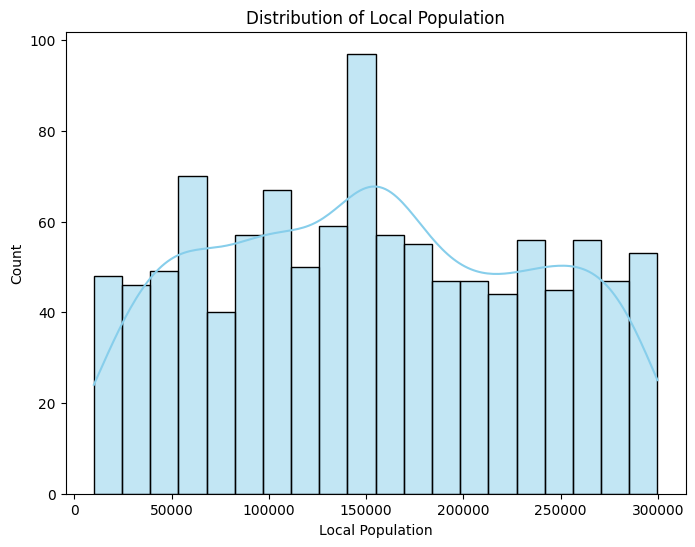

In [25]:
# Graph 1 - Local Population - Histogram

plt.figure(figsize=(8, 6))
sns.histplot(df['local_pop'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Local Population')
plt.xlabel('Local Population')
plt.ylabel('Count')
plt.show()

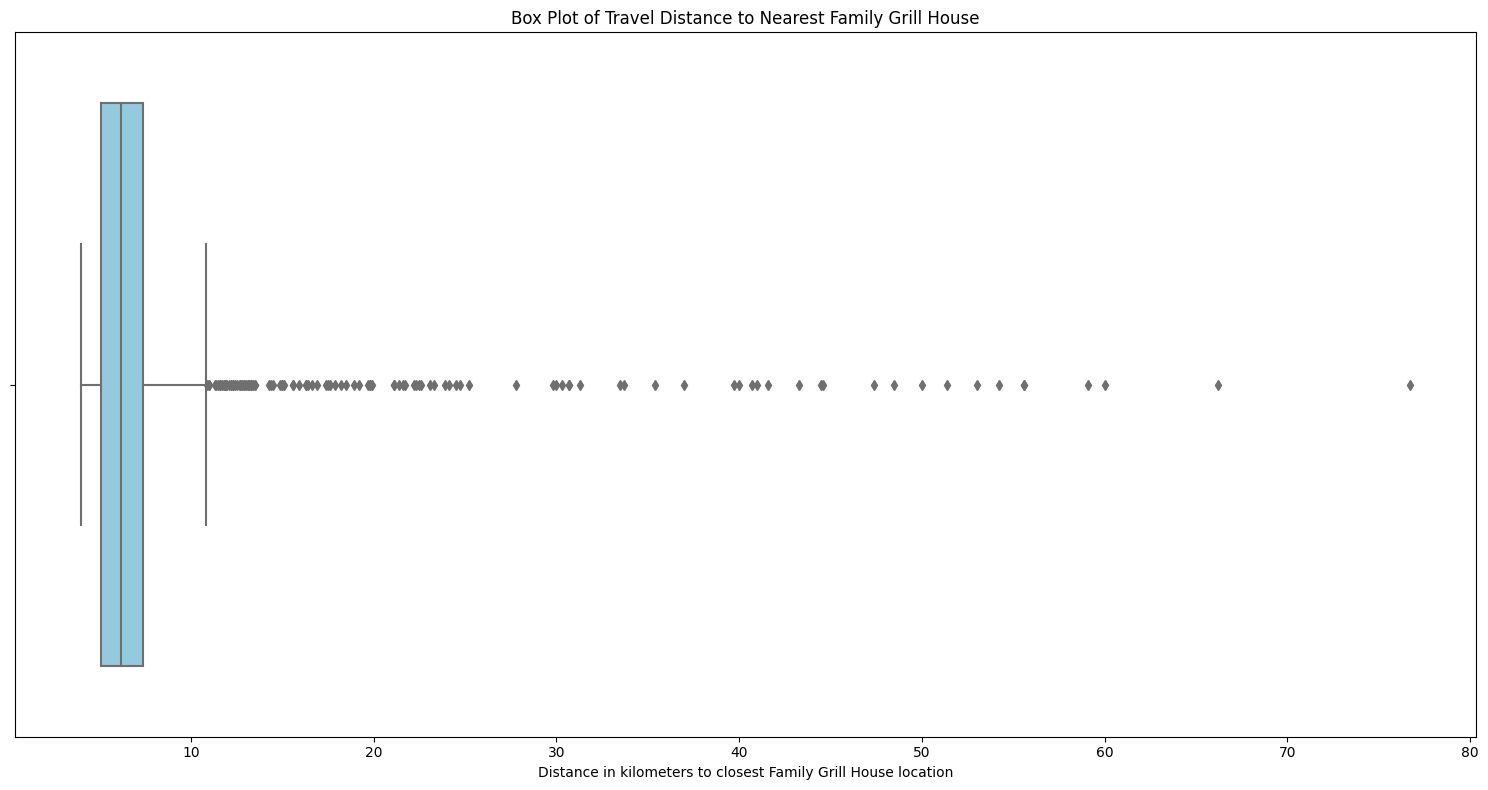

In [26]:
# Graph 2 - Box plots illustrating numerical values
plt.figure(figsize=(15, 8)) 
sns.boxplot(x=df['nearest_fgh'], color='skyblue')
plt.title(f'Box Plot of Travel Distance to Nearest Family Grill House')
plt.xlabel('Distance in kilometers to closest Family Grill House location')
plt.tight_layout()
plt.show() 

### Multiple variable graphs:
1. A count plot depicting the correlation between the number of work hours, quantity, and the profits garnered in the third year.
2. A Scatter plot illustrating the relationship among competitors, local_pop, and year_3_profit.

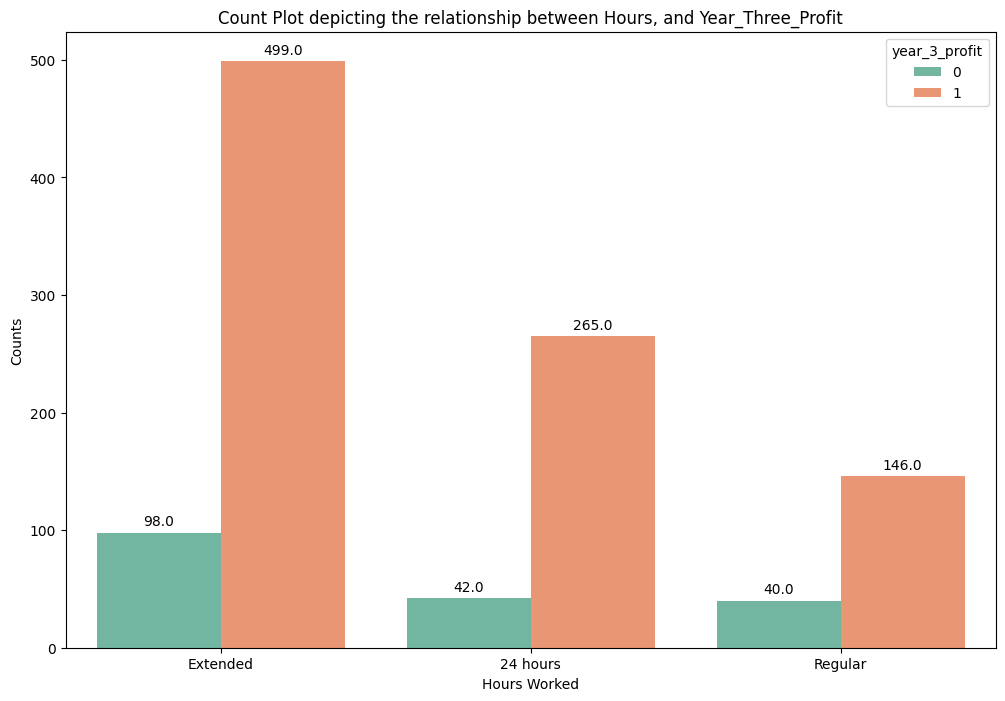

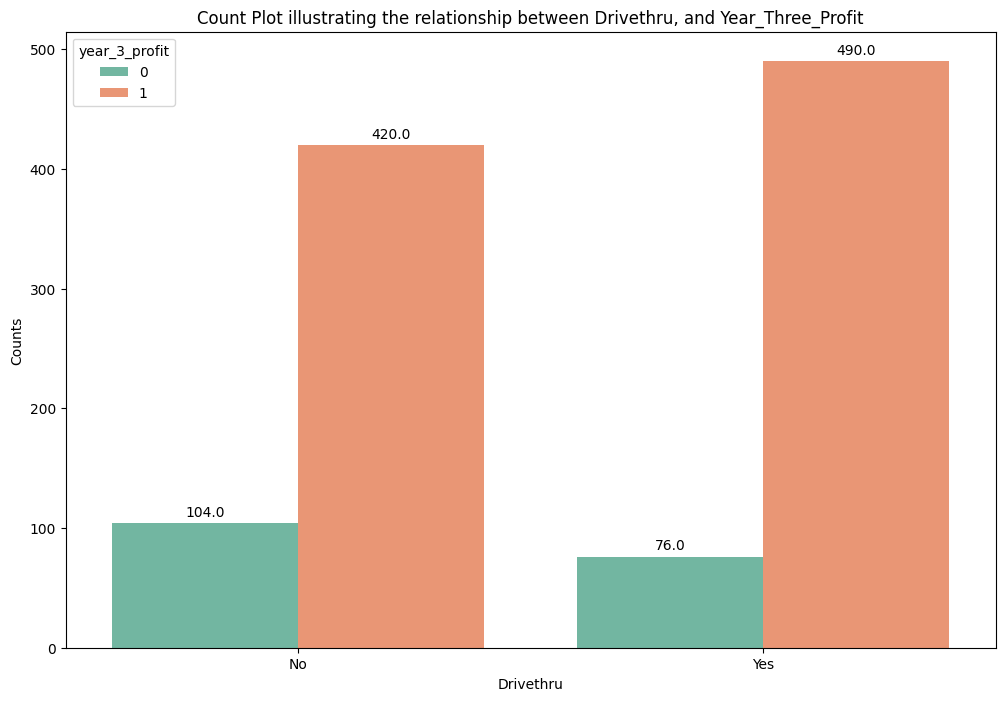

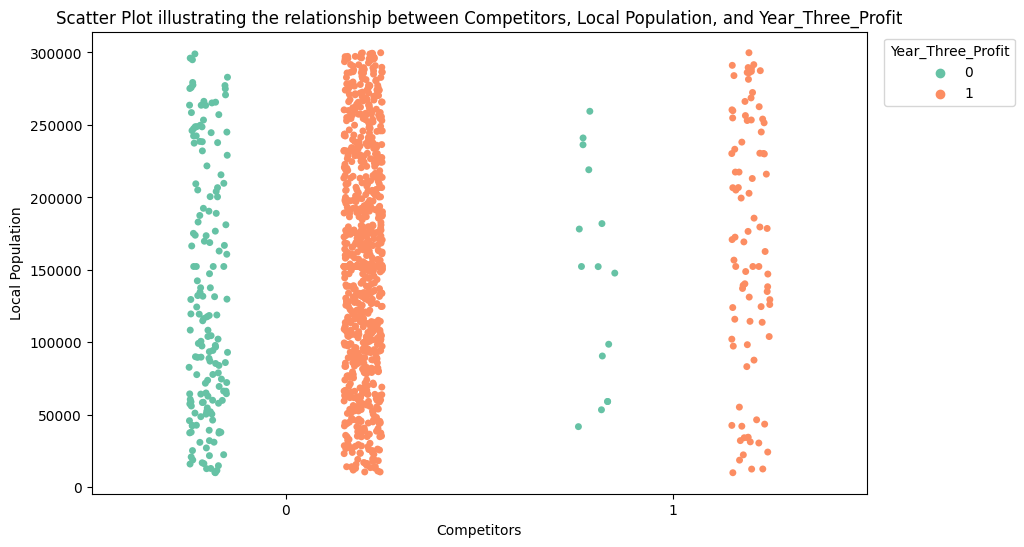

In [27]:
# Graph1 - Hours versus Count versus Year Three Profit
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='hours', hue='year_3_profit', data=df, palette='Set2', dodge=True)
plt.title('Count Plot depicting the relationship between Hours, and Year_Three_Profit')
plt.xlabel('Hours Worked')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', 
    fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.show()

# Graph2 - Drivethru versus Count Histogram and the Year Three Profit
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='drivethru', hue='year_3_profit', data=df, palette='Set2', dodge=True)
plt.title('Count Plot illustrating the relationship between Drivethru, and Year_Three_Profit')
plt.xlabel('Drivethru')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', 
    fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.show()

# Graph3 - Competitors versus Local Population versus Year Three Profit Scatter Plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='competitors', y='local_pop', hue='year_3_profit', data=df, palette='Set2', dodge=True)
plt.title('Scatter Plot illustrating the relationship between Competitors, Local Population, and Year_Three_Profit')
plt.xlabel('Competitors')
plt.ylabel('Local Population')
plt.legend(title='Year_Three_Profit', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### **Exploratory Analysis - Findings**
1. The feature nearest_fgh exhibits numerous outliers. which is expected
2. The median distance from the fgh restaurant to the highway is approximately 15 km.
3. There is a greater revenue generation from the stores operating extended hours.
4. The establishments with drive-thru facilities tend to generate more profit than the ones without it.
5. The stores with no competition and in areas with higher local populations show greater profitability.

Correlation between the columns 

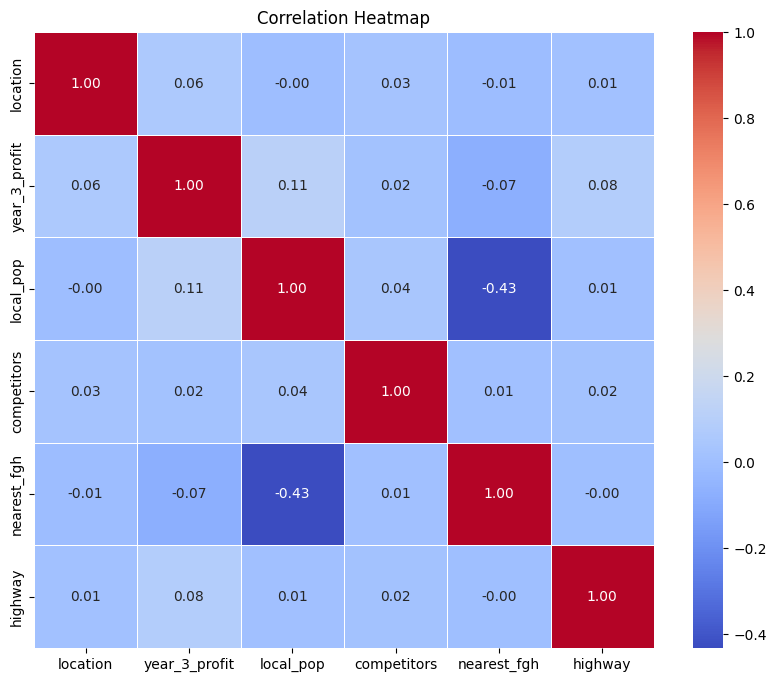

In [30]:
# Correlation between the columns 
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## Model Development/Business Focus 

### Prepare Data for Modelling
1. Target Variable - "year_3_profit" - Since our aim is to determine the success of a restaurant location through analysis, this has been identified as our target variable. 

2. Upon investigation, it has been determined that the "location" feature can be dropped, as it merely serves as a unique identifier.

3. The "local_pop" feature has been appropriately scaled for analysis.
4. Normalize the numeric features
5. Convert the categorical variables into numeric features

In [31]:
# # Drop the 'location' column as it is unique and independent feature
df = df.drop('location', axis=1)
import numpy as np
df['local_pop'] = np.log(df['local_pop'])
hour_mapping = {'Regular': 0, 'Extended': 1, '24 hours': 2}
df['hours'] = df['hours'].map(hour_mapping)
df['drivethru'] = df['drivethru'].replace({'No': 0, 'Yes': 1})

### Model Fitting & Evaluation

1. It appears that we have a binary classification problem, as the target variable year_3_profit has two possible values: 0 or 1. In binary classification, we aim to predict a categorical outcome with two classes.
2. We have chosen logistic regression as the baseline. Considering the imbalanced class distribution indicated by the count of observations, we have addressed this class imbalance.Here, it seems that the profitable class is more prevalent, and misclassifying this class is more costly than the other.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score

X = df[['nearest_fgh','competitors', 'highway','drivethru','hours','local_pop']]
y = df['year_3_profit']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Create a logistic regression model with class weights
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(f'Logistic Regression Model accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Model accuracy: 58.72%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.53      0.29        34
           1       0.87      0.60      0.71       184

    accuracy                           0.59       218
   macro avg       0.53      0.56      0.50       218
weighted avg       0.77      0.59      0.64       218

Logistic Regression Confusion Matrix:
[[ 18  16]
 [ 74 110]]


### **Fitting a comparison model**

Model - Randomforest classification.
1. The Random Forest classification model was selected owing to the intricate and non-linear relationship between the target variable and features, as well as the presence of an imbalanced dataset. 
2. Hyperparameters were meticulously selected to attain superior accuracy.
3. In consideration of the class imbalance, suitable sampling techniques have been employed. 
4. The feature importance has been visually represented to discern the features that wield greater influence on profitability.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

rf_model = RandomForestClassifier(max_depth=None,
                                  max_features='log2',
                                  min_samples_leaf=4,
                                  min_samples_split=2,
                                  n_estimators=50,
                                  random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train the model
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)


# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)

print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

print('Random Forest Classification Report:\n', classification_rep)

print('Random Forest Confusion Matrix:\n', conf_matrix)

Random Forest Model Accuracy: 92.66%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.97      0.95      0.96       184

    accuracy                           0.93       218
   macro avg       0.85      0.88      0.87       218
weighted avg       0.93      0.93      0.93       218

Random Forest Confusion Matrix:
 [[ 28   6]
 [ 10 174]]


## **Model Evaluation**

Logistic Regression vs. Random Forest:

1. Random Forest represents an ensemble learning algorithm that combines multiple decision trees, often resulting in more robust and accurate predictions. This approach helps to minimize the risk of overfitting in comparison to individual decision trees. Therefore, incorporating the random forest model can provide more accurate fit than the baseline model logistic regression, and the decison trees as well.

2. The key performance indicator (KPI) for this analysis is accuracy. In comparison to logistic regression's 58.7% accuracy, the random forest model achieves significantly higher accuracy at 92.6%.

3. On examination of the classification metrics, the random forest ensemble model exhibits greater precision, recall, and F1 score than the logistic regression model.

Definition of a metric for the business to monitor:
 The metrics we should monitor include model accuracy, precision, recall, and F1 score, as well as the importance of the features on which the target variable depends."

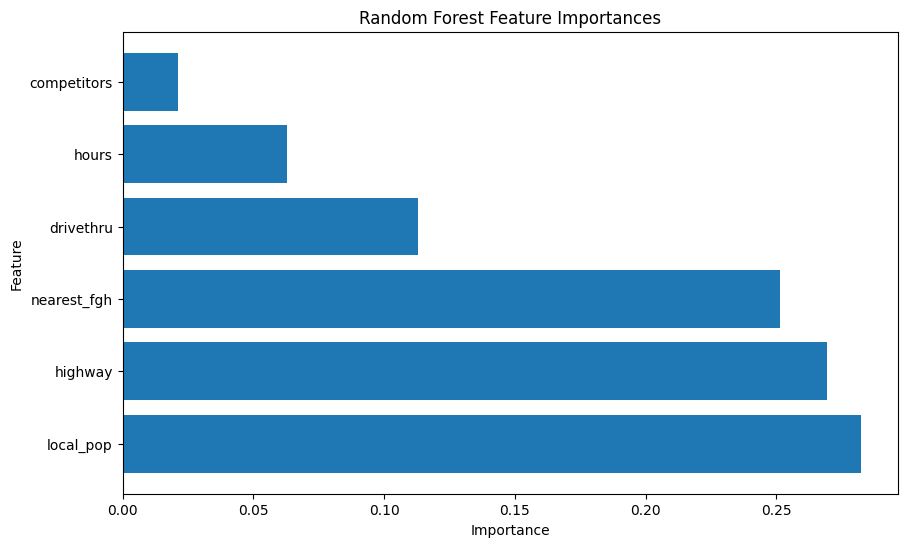

Feature Importances:
       Feature  Importance
5    local_pop    0.282186
2      highway    0.269214
0  nearest_fgh    0.251415
3    drivethru    0.113071
4        hours    0.062725
1  competitors    0.021388


In [34]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

# Display the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)

## Final Summary/Recommendations:

1. The random forest model is a reliable method to evaluate the profitability of a novel eatery. Its predictive capacity is commendable at 92%.

2. Key factors influencing profitability are local population (0.28), proximity to highways (0.27), and distance from other FGH stores (0.25). It is critical to seek a location with dense local population, close proximity to highways, and significant distance from rival FGH establishments. Additionally, it is advisable to expand hours of operation and offer drive-thru services to optimize profits.

3. Enhance the model by constantly acquiring more data,engineering features, and refining parameters.